# Rendu 3 : Cas de tests
---------------------------------------

### Imports

In [1]:
import math

from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.lines as mlines
import matplotlib.pyplot as plt
import numpy as np

import rustymachine

### Fonction draw_2d --> Model + Graph 2D

In [2]:
def draw_2d(model, X, Y):
    max_x = math.ceil(max(x[0] for x in X))
    max_y = math.ceil(max(x[1] for x in X))
    
    min_x = math.floor(min(x[0] for x in X))
    min_y = math.floor(min(x[1] for x in X))    
    
    #for x, y in zip(X, Y):
    #    print(f"{x} => Expected {y}, get {model.predict(x)}")

    # DISPLAY
    XToPredict = [
        [i / 100.0, j / 100.0]
        for i in range(min_x * 100, max_x * 100) for j in range(min_y * 100, max_y * 100)
    ]
    YPredicted = [
        model.predict(x) for x in XToPredict
    ]

    XToPlotUnHappy = []
    XToPlotHappy = []
    for i, val in enumerate(YPredicted):
        if val >= 0:
            XToPlotHappy.append(XToPredict[i])
        else:
            XToPlotUnHappy.append(XToPredict[i])

    def get(i, l):
        return [z[i] for z in l]

    plt.scatter(
        get(0, XToPlotUnHappy),
        get(1, XToPlotUnHappy),
        color="yellow"
    )
    plt.scatter(
        get(0, XToPlotHappy),
        get(1, XToPlotHappy),
        color="violet"
    )
    plt.scatter(
        get(0, [x for j, x in enumerate(X) if Y[j] == -1]),
        get(1, [x for j, x in enumerate(X) if Y[j] == -1]),
        color='red'
    )
    plt.scatter(
        get(0, [x for j, x in enumerate(X) if Y[j] != -1]),
        get(1, [x for j, x in enumerate(X) if Y[j] != -1]),
        color='blue'
    )
    plt.show()
    plt.clf()

# <font color='red'>CLASSIFICATION</font>
---------------------------------------

## Classic RBF :

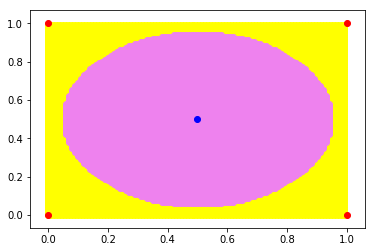

<Figure size 432x288 with 0 Axes>

In [3]:
X = [[0, 0], [0, 1], [1, 0], [1, 1], [0.5, 0.5]]
Y = [-1, -1, -1, -1, 1]

model = rustymachine.Rbf(
    gamma=1,
    x_train=X,
    y_train=Y,
)
model.fit()
draw_2d(model, X, Y)

### Hazard RBF

In [4]:
X = [
    [0.2, 0.8],
    [0, 0],
    [0, 1],
    [0.7, 0.7],
    [1, 1],
    [0.5, 1],
    [1, 0.3],
    [0.7, 0.3],
    [0.7, 0.5],
    [0.4, 0.2],
    [0.2, 0.4],
]
Y = [
    1,
    -1,
    -1,
    -1,
    1,
    -1,
    1,
    1,
    1,
    1,
    -1
]

model = rustymachine.Rbf(
    gamma=1,
    x_train=X,
    y_train=Y,
)
model.fit()
draw_2d(model, X, Y)

<Figure size 432x288 with 0 Axes>

## Linear Simple :
   <font color='green'>- Linear Model : OK</font>

   <font color='green'>- MLP (2, 1)   : OK</font>
   
   <font color='green'>- RBF naif   : OK</font>

In [5]:
X = np.array([
      [1, 1],
      [2, 3],
      [3, 3]
])
Y = np.array([
      1,
      -1,
      -1
])

### Linear Model

In [6]:
model = rustymachine.Linear(
    alpha=0.1,
    x_train=X,
    y_train=Y,
)

model.fit(
    epochs=10000,
)

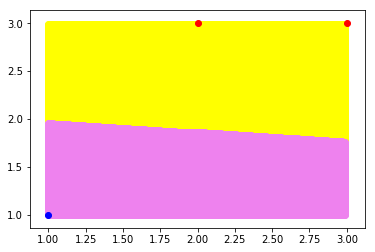

<Figure size 432x288 with 0 Axes>

In [7]:
draw_2d(model, X, Y)

### MLP (2, 1)

In [8]:
model = rustymachine.Mlp(
    alpha=0.1,
    x_train=X,
    y_train=Y,
    npl=[1]
)

model.fit(
    epochs=5000,
)

In [9]:
XToPredict = [
    [i / 100.0, j / 100.0]
    for i in range(-100, 350) for j in range(-100, 350)
]
YPredicted = [
    model.predict(x) for x in XToPredict
]

XToPlotUnHappy = []
XToPlotHappy = []
for i, val in enumerate(YPredicted):
    if val[0] >= 0:
        XToPlotHappy.append(XToPredict[i])
    else:
        XToPlotUnHappy.append(XToPredict[i])

def get(i, l):
    return [z[i] for z in l]

plt.scatter(
    get(0, XToPlotUnHappy),
    get(1, XToPlotUnHappy),
    color="yellow"
)
plt.scatter(
    get(0, XToPlotHappy),
    get(1, XToPlotHappy),
    color="violet"
)
plt.scatter(
    get(0, [x for j, x in enumerate(X) if Y[j] == -1]),
    get(1, [x for j, x in enumerate(X) if Y[j] == -1]),
    color='red'
)
plt.scatter(
    get(0, [x for j, x in enumerate(X) if Y[j] != -1]),
    get(1, [x for j, x in enumerate(X) if Y[j] != -1]),
    color='blue'
)
plt.show()
plt.clf()

<Figure size 432x288 with 0 Axes>

### RBF naif

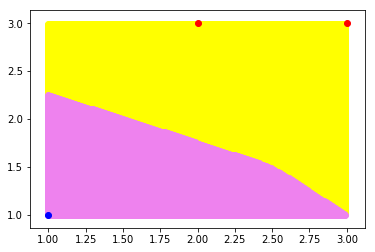

<Figure size 432x288 with 0 Axes>

In [10]:
model = rustymachine.Rbf(
    gamma=10,
    x_train=X,
    y_train=Y,
)
model.fit()
draw_2d(model, X.tolist(), Y.tolist())

## Linear Multiple :
   <font color='green'>- Linear Model : OK</font>

   <font color='green'>- MLP (2, 1)   : OK</font>
   
   <font color='green'>- RBF naif   : OK</font>

In [11]:
X = np.concatenate([np.random.random((50, 2)) * 0.9 + np.array([1, 1]), np.random.random((50,2)) * 0.9 + np.array([2, 2])])
Y = np.concatenate([np.ones((50, 1)), np.ones((50, 1)) * -1.0]).flatten()

### Linear Model

In [12]:
model = rustymachine.Linear(
    alpha=0.001,
    x_train=X,
    y_train=Y,
)
model.fit(epochs=30000)

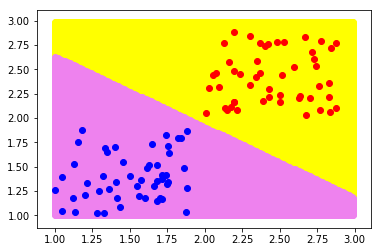

<Figure size 432x288 with 0 Axes>

In [13]:
draw_2d(model, X.tolist(), Y.tolist())

### MLP (2, 1)

In [14]:
model = rustymachine.Mlp(
    alpha=0.1,
    x_train=X,
    y_train=Y,
    npl=[1]
)

model.fit(
    epochs=5000,
)

In [15]:
XToPredict = [
    [i / 100.0, j / 100.0]
    for i in range(0, 350) for j in range(0, 350)
]
YPredicted = [
    model.predict(x) for x in XToPredict
]

XToPlotUnHappy = []
XToPlotHappy = []
for i, val in enumerate(YPredicted):
    if val[0] >= 0:
        XToPlotHappy.append(XToPredict[i])
    else:
        XToPlotUnHappy.append(XToPredict[i])

def get(i, l):
    return [z[i] for z in l]

plt.scatter(
    get(0, XToPlotUnHappy),
    get(1, XToPlotUnHappy),
    color="yellow"
)
plt.scatter(
    get(0, XToPlotHappy),
    get(1, XToPlotHappy),
    color="violet"
)
plt.scatter(
    get(0, [x for j, x in enumerate(X) if Y[j] == -1]),
    get(1, [x for j, x in enumerate(X) if Y[j] == -1]),
    color='red'
)
plt.scatter(
    get(0, [x for j, x in enumerate(X) if Y[j] != -1]),
    get(1, [x for j, x in enumerate(X) if Y[j] != -1]),
    color='blue'
)
plt.show()
plt.clf()

<Figure size 432x288 with 0 Axes>

### RBF naif

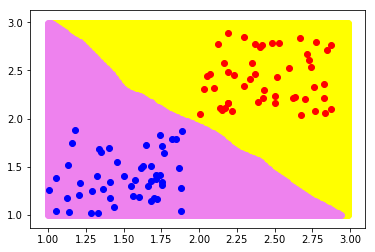

<Figure size 432x288 with 0 Axes>

In [16]:
model = rustymachine.Rbf(
    gamma=100,
    x_train=X,
    y_train=Y,
)
model.fit()
draw_2d(model, X.tolist(), Y.tolist())

## XOR :
   <font color='red'>- Linear Model : KO</font>

   <font color='green'>- MLP (2, 2, 1)   : OK</font>
   
   <font color='green'>- RBF naif   : OK</font>

In [17]:
X = np.array([[1, 0], [0, 1], [0, 0], [1, 1]])
Y = np.array([1, 1, -1, -1])

### Linear Model

In [18]:
model = rustymachine.Linear(
    alpha=0.1,
    x_train=X,
    y_train=Y,
)
model.fit(epochs=1000)

In [19]:
draw_2d(model, X, Y)

<Figure size 432x288 with 0 Axes>

### MLP (2, 2, 1)

In [20]:
model = rustymachine.Mlp(
    alpha=0.1,
    x_train=X,
    y_train=Y,
    npl=[2, 1]
)
model.fit(
    epochs=5000,
)

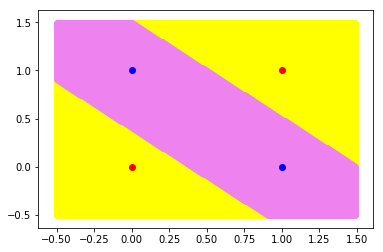

<Figure size 432x288 with 0 Axes>

In [21]:
XToPredict = [
    [i / 100.0, j / 100.0]
    for i in range(-50, 150) for j in range(-50, 150)
]
YPredicted = [
    model.predict(x) for x in XToPredict
]

XToPlotUnHappy = []
XToPlotHappy = []
for i, val in enumerate(YPredicted):
    if val[0] >= 0:
        XToPlotHappy.append(XToPredict[i])
    else:
        XToPlotUnHappy.append(XToPredict[i])

def get(i, l):
    return [z[i] for z in l]

plt.scatter(
    get(0, XToPlotUnHappy),
    get(1, XToPlotUnHappy),
    color="yellow"
)
plt.scatter(
    get(0, XToPlotHappy),
    get(1, XToPlotHappy),
    color="violet"
)
plt.scatter(
    get(0, [x for j, x in enumerate(X) if Y[j] == -1]),
    get(1, [x for j, x in enumerate(X) if Y[j] == -1]),
    color='red'
)
plt.scatter(
    get(0, [x for j, x in enumerate(X) if Y[j] != -1]),
    get(1, [x for j, x in enumerate(X) if Y[j] != -1]),
    color='blue'
)
plt.show()
plt.clf()

### RBF naif

In [22]:
model = rustymachine.Rbf(
    gamma=0.1,
    x_train=X,
    y_train=Y,
)
model.fit()
draw_2d(model, X.tolist(), Y.tolist())

<Figure size 432x288 with 0 Axes>

## CROSS :
   <font color='red'>- Linear Model : KO</font>

   <font color='green'>- MLP (2, 4, 1)   : OK</font>

   <font color='green'>- RBF naif   : OK</font>

In [23]:
X = np.random.random((500, 2)) * 2.0 - 1.0
Y = np.array([1 if abs(p[0]) <= 0.3 or abs(p[1]) <= 0.3 else -1 for p in X])

### Linear Model

In [24]:
model = rustymachine.Linear(
    alpha=0.1,
    x_train=X.tolist(),
    y_train=Y.tolist(),
)
model.fit(epochs=1000)

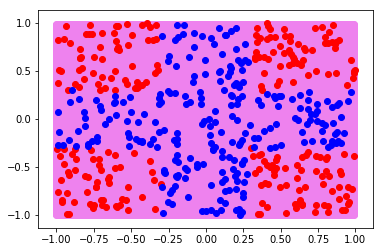

<Figure size 432x288 with 0 Axes>

In [25]:
draw_2d(model, X, Y)

### MLP (2, 4, 1)

In [26]:
model = rustymachine.Mlp(
    alpha=0.1,
    x_train=X,
    y_train=Y,
    npl=[4, 1]
)
model.fit(
    epochs=5000,
)

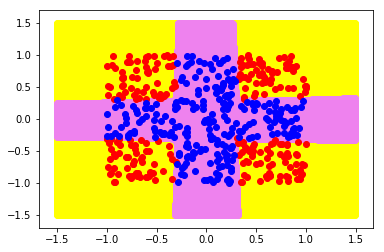

<Figure size 432x288 with 0 Axes>

In [27]:
XToPredict = [
    [i / 100.0, j / 100.0]
    for i in range(-150, 150) for j in range(-150, 150)
]
YPredicted = [
    model.predict(x) for x in XToPredict
]

XToPlotUnHappy = []
XToPlotHappy = []
for i, val in enumerate(YPredicted):
    if val[0] >= 0:
        XToPlotHappy.append(XToPredict[i])
    else:
        XToPlotUnHappy.append(XToPredict[i])

def get(i, l):
    return [z[i] for z in l]

plt.scatter(
    get(0, XToPlotUnHappy),
    get(1, XToPlotUnHappy),
    color="yellow"
)
plt.scatter(
    get(0, XToPlotHappy),
    get(1, XToPlotHappy),
    color="violet"
)
plt.scatter(
    get(0, [x for j, x in enumerate(X) if Y[j] == -1]),
    get(1, [x for j, x in enumerate(X) if Y[j] == -1]),
    color='red'
)
plt.scatter(
    get(0, [x for j, x in enumerate(X) if Y[j] != -1]),
    get(1, [x for j, x in enumerate(X) if Y[j] != -1]),
    color='blue'
)
plt.show()
plt.clf()

## Multi Linear 3 classes :
   <font color='green'>- Linear Model (x3) : OK</font>

   <font color='green'>- MLP (2, 3)   : OK</font>
   
   <font color='green'>- RBF naif   : OK</font>

In [11]:
X = np.random.random((500, 2)) * 2.0 - 1.0
Y = np.array([[1, -1, -1] if -p[0] - p[1] - 0.5 > 0 and p[1] < 0 and p[0] - p[1] - 0.5 < 0 else 
              [-1, 1, -1] if -p[0] - p[1] - 0.5 < 0 and p[1] > 0 and p[0] - p[1] - 0.5 < 0 else 
              [-1, -1, 1] if -p[0] - p[1] - 0.5 < 0 and p[1] < 0 and p[0] - p[1] - 0.5 > 0 else 
              [-1, -1, -1] for p in X])

### Linear Model

In [12]:
model_one = rustymachine.Linear(
    alpha=0.0001,
    x_train=X,
    y_train=[1 if y == [1, -1, -1] else -1 for y in Y.tolist()],
)
model_one.fit(epochs=5000)

model_two = rustymachine.Linear(
    alpha=0.0001,
    x_train=X,
    y_train=[1 if y == [-1, 1, -1] else -1 for y in Y.tolist()],
)
model_two.fit(epochs=5000)

model_three = rustymachine.Linear(
    alpha=0.0001,
    x_train=X,
    y_train=[1 if y == [-1, -1, 1] else -1 for y in Y.tolist()],
)
model_three.fit(epochs=5000)

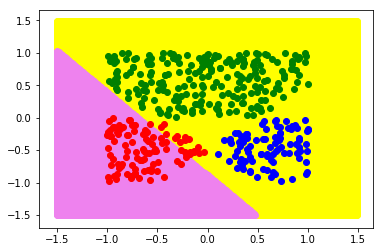

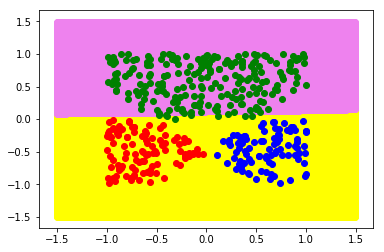

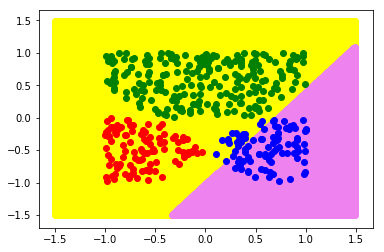

<Figure size 432x288 with 0 Axes>

In [13]:
def draw(model, X, Y):
    X = X.tolist()
    Y = Y.tolist()
    
    XToPredict = [
        [i / 100.0, j / 100.0]
        for i in range(-150, 150) for j in range(-150, 150)
    ]
    YPredicted = [
        model.predict(x) for x in XToPredict
    ]

    XToPlotUnHappy = []
    XToPlotHappy = []
    for i, val in enumerate(YPredicted):
        if val >= 0:
            XToPlotHappy.append(XToPredict[i])
        else:
            XToPlotUnHappy.append(XToPredict[i])

    def get(i, l):
        return [z[i] for z in l]

    plt.scatter(
        get(0, XToPlotUnHappy),
        get(1, XToPlotUnHappy),
        color="yellow"
    )
    plt.scatter(
        get(0, XToPlotHappy),
        get(1, XToPlotHappy),
        color="violet"
    )
    plt.scatter(
        get(0, [x for j, x in enumerate(X) if Y[j] == [1, -1, -1]]),
        get(1, [x for j, x in enumerate(X) if Y[j] == [1, -1, -1]]),
        color='red'
    )
    plt.scatter(
        get(0, [x for j, x in enumerate(X) if Y[j] == [-1, 1, -1]]),
        get(1, [x for j, x in enumerate(X) if Y[j] == [-1, 1, -1]]),
        color='green'
    )
    plt.scatter(
        get(0, [x for j, x in enumerate(X) if Y[j] == [-1, -1, 1]]),
        get(1, [x for j, x in enumerate(X) if Y[j] == [-1, -1, 1]]),
        color='blue'
    )
    plt.show()
    plt.clf()

draw(model_one, X, Y)
draw(model_two, X, Y)
draw(model_three, X, Y)

### MLP (2, 3)

In [31]:
model = rustymachine.Mlp(
    alpha=0.1,
    x_train=X,
    y_train=Y,
    npl=[2, 3]
)
model.fit(
    epochs=10000,
)

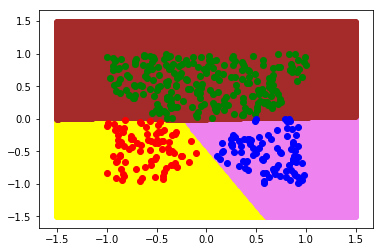

<Figure size 432x288 with 0 Axes>

In [32]:
def draw(model, X, Y):
    X = X.tolist()
    Y = Y.tolist()

    XToPredict = [
        [i / 100.0, j / 100.0]
        for i in range(-150, 150) for j in range(-150, 150)
    ]
    YPredicted = [
        model.predict(x) for x in XToPredict
    ]

    reds = []
    blues = []
    greens = []

    for i, val in enumerate(YPredicted):
        #print(val)
        if val == [1, -1, -1]:
            reds.append(XToPredict[i])
        elif val == [-1, 1, -1]:
            greens.append(XToPredict[i])
        elif val == [-1, -1, 1]:
            blues.append(XToPredict[i])

    def get(i, l):
        return [z[i] for z in l]

    plt.scatter(
        get(0, reds),
        get(1, reds),
        color="yellow"
    )
    plt.scatter(
        get(0, blues),
        get(1, blues),
        color="violet"
    )
    plt.scatter(
        get(0, greens),
        get(1, greens),
        color="brown"
    )
    plt.scatter(
        get(0, [x for j, x in enumerate(X) if Y[j] == [1, -1, -1]]),
        get(1, [x for j, x in enumerate(X) if Y[j] == [1, -1, -1]]),
        color='red'
    )
    plt.scatter(
        get(0, [x for j, x in enumerate(X) if Y[j] == [-1, 1, -1]]),
        get(1, [x for j, x in enumerate(X) if Y[j] == [-1, 1, -1]]),
        color='green'
    )
    plt.scatter(
        get(0, [x for j, x in enumerate(X) if Y[j] == [-1, -1, 1]]),
        get(1, [x for j, x in enumerate(X) if Y[j] == [-1, -1, 1]]),
        color='blue'
    )
    plt.show()
    plt.clf()
    
draw(model, X, Y)

## Multi Cross :
   <font color='red'>- Linear Model X3 : KO</font>

   <font color='green'>- MLP (2, ?, ?, 3)   : OK</font>
   
   <font color='green'>- RBF naif   : OK</font>

In [33]:
X = np.random.random((1000, 2)) * 2.0 - 1.0
Y = np.array([[1, -1, -1] if abs(p[0] % 0.5) <= 0.25 and abs(p[1] % 0.5) > 0.25 else 
              [-1, 1, -1] if abs(p[0] % 0.5) > 0.25 and abs(p[1] % 0.5) <= 0.25 else 
              [-1, -1, 1] for p in X])

In [34]:
def draw(model, X, Y):
    X = X.tolist()
    Y = Y.tolist()

    XToPredict = [
        [i / 100.0, j / 100.0]
        for i in range(-100, 100) for j in range(-100, 100)
    ]
    YPredicted = [
        model.predict(x) for x in XToPredict
    ]

    reds = []
    blues = []
    greens = []

    for i, val in enumerate(YPredicted):
        if val == [1, -1, -1]:
            reds.append(XToPredict[i])
        elif val == [-1, 1, -1]:
            greens.append(XToPredict[i])
        elif val == [-1, -1, 1]:
            blues.append(XToPredict[i])

    def get(i, l):
        return [z[i] for z in l]

    plt.scatter(
        get(0, reds),
        get(1, reds),
        color="yellow"
    )
    plt.scatter(
        get(0, blues),
        get(1, blues),
        color="violet"
    )
    plt.scatter(
        get(0, greens),
        get(1, greens),
        color="brown"
    )
    plt.scatter(
        get(0, [x for j, x in enumerate(X) if Y[j] == [1, -1, -1]]),
        get(1, [x for j, x in enumerate(X) if Y[j] == [1, -1, -1]]),
        color='red'
    )
    plt.scatter(
        get(0, [x for j, x in enumerate(X) if Y[j] == [-1, 1, -1]]),
        get(1, [x for j, x in enumerate(X) if Y[j] == [-1, 1, -1]]),
        color='green'
    )
    plt.scatter(
        get(0, [x for j, x in enumerate(X) if Y[j] == [-1, -1, 1]]),
        get(1, [x for j, x in enumerate(X) if Y[j] == [-1, -1, 1]]),
        color='blue'
    )
    plt.show()
    plt.clf()

### MLP (2, 2, 2, 3)

In [35]:
model_2_2_3 = rustymachine.Mlp(
    alpha=0.001,
    x_train=X,
    y_train=Y,
    npl=[2, 2, 3]
)
model_2_2_3.fit(
    epochs=10000,
)

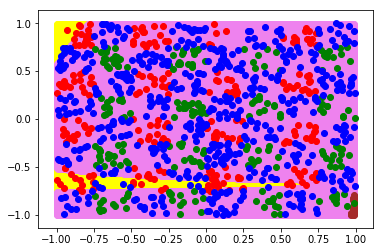

<Figure size 432x288 with 0 Axes>

In [36]:
draw(model_2_2_3, X, Y)

### MLP (2, 8, 4, 3)

In [37]:
model_8_4_3 = rustymachine.Mlp(
    alpha=0.001,
    x_train=X,
    y_train=Y,
    npl=[8, 4, 3]
)
model_8_4_3.fit(
    epochs=10000,
)

In [38]:
draw(model_8_4_3, X, Y)

<Figure size 432x288 with 0 Axes>

### MLP (2, 8, 16, 3)

In [39]:
model_8_16_3 = rustymachine.Mlp(
    alpha=0.001,
    x_train=X,
    y_train=Y,
    npl=[8, 16, 3]
)
model_8_16_3.fit(
    epochs=10000,
)

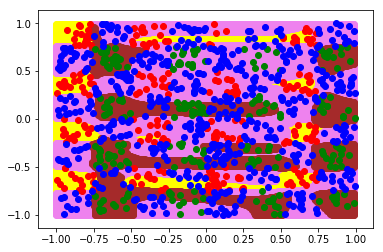

<Figure size 432x288 with 0 Axes>

In [40]:
draw(model_8_16_3, X, Y)

### MLP (2, 16, 8, 3)

In [41]:
model_16_8_3 = rustymachine.Mlp(
    alpha=0.001,
    x_train=X,
    y_train=Y,
    npl=[16, 8, 3]
)
model_16_8_3.fit(
    epochs=10000,
)

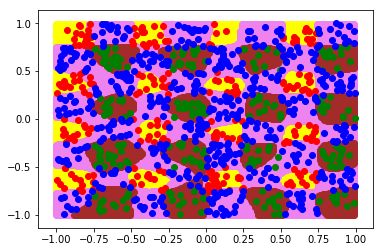

<Figure size 432x288 with 0 Axes>

In [42]:
draw(model_16_8_3, X, Y)

<br><br>
# <font color='red'>REGRESSION</font>
---------------------------------------

In [43]:
def draw_2d(model, X, Y, lower=0, upper=300):
    for x, y in zip(X.tolist(), Y.tolist()):
        plt.scatter(
            x,
            y,
            color='red'
        )

    for i in range(lower, upper):
        i /= 100
        plt.scatter(i, model.predict([i]), marker=',', color='b', s=1)

    plt.show()
    plt.clf()

In [44]:
def draw_3d(model, X, Y, lower=0, upper=801):
    fig = plt.figure()
    ax = Axes3D(fig)
    ax.scatter(X[:,0], X[:,1], Y, color="red")

    XX, YY, ZZ = [], [], []

    for i in range(lower, upper, 10):
        for j in range(lower, upper, 10):
            i /= 100
            j /= 100
            XX.append(i)
            YY.append(j)
            zz = model.predict([i, j])
            ZZ.append(zz[0] if isinstance(zz, list) else zz)

    ax.plot_trisurf(XX, YY, ZZ, lw=0, color="grey", alpha=0.5)
    plt.show()

## Linear Simple 2D :
   <font color='green'> - Linear Model : OK</font>
   
   <font color='green'> - MLP (1, 1)   : OK</font>
   
   <font color='green'>- RBF naif   : OK</font>

In [45]:
X = np.array([
    [1],
    [2]
])

Y = np.array([
    2,
    3
])

 ### Linear Model

In [46]:
model = rustymachine.Linear(
    x_train=X,
    y_train=Y,
    type_=rustymachine.REGRESSION,
)
model.fit()

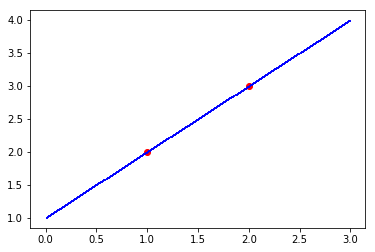

<Figure size 432x288 with 0 Axes>

In [47]:
draw_2d(model, X, Y)

### MLP (1, 1)

In [48]:
model = rustymachine.Mlp(
    alpha=0.1,
    x_train=X,
    y_train=Y,
    npl=[1],
    type_=rustymachine.REGRESSION
)
model.fit(
    epochs=10000,
)

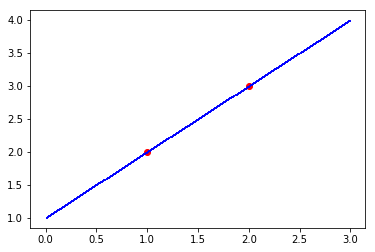

<Figure size 432x288 with 0 Axes>

In [49]:
draw_2d(model, X, Y)

### RBF naif

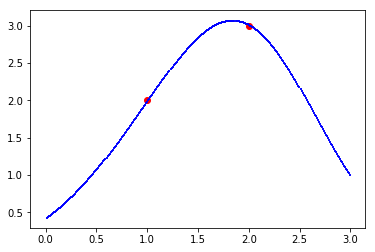

<Figure size 432x288 with 0 Axes>

In [50]:
model = rustymachine.Rbf(
    gamma=1,
    x_train=X,
    y_train=Y,
    type_=rustymachine.REGRESSION
)
model.fit()
draw_2d(model, X, Y)

## Non Linear Simple 2D :
   <font color='green'> - Linear Model : OK</font>
   
   <font color='green'> - MLP (1, ?, 1)   : OK</font>
   
   <font color='green'>- RBF naif   : OK</font>

In [51]:
X = np.array([
      [1],
      [2],
      [3]
])
Y = np.array([
      2,
      3,
      2.5
])

 ### Linear Model

In [52]:
model = rustymachine.Linear(
    x_train=X,
    y_train=Y,
    type_=rustymachine.REGRESSION,
)
model.fit()

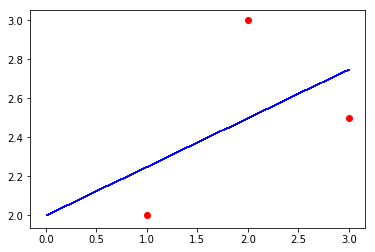

<Figure size 432x288 with 0 Axes>

In [53]:
draw_2d(model, X, Y)

### MLP (1, ?, 1)

In [54]:
model = rustymachine.Mlp(
    alpha=0.1,
    x_train=X,
    y_train=Y,
    npl=[4, 1],
    type_=rustymachine.REGRESSION
)
model.fit(
    epochs=10000,
)

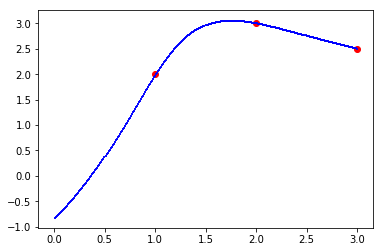

<Figure size 432x288 with 0 Axes>

In [55]:
draw_2d(model, X, Y)

### RBF naif

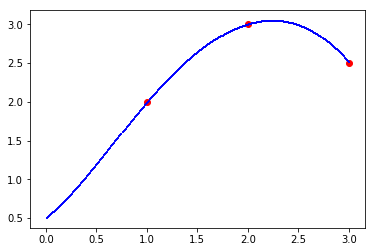

<Figure size 432x288 with 0 Axes>

In [56]:
model = rustymachine.Rbf(
    gamma=1,
    x_train=X,
    y_train=Y,
    type_=rustymachine.REGRESSION
)
model.fit()
draw_2d(model, X, Y)

## Linear Simple 3D :
   <font color='green'> - Linear Model : OK</font>
   
   <font color='green'> - MLP (2, 1)   : OK</font>
   
   <font color='green'>- RBF naif   : OK</font>

In [57]:
%matplotlib notebook

In [58]:
X = np.array([
      [1, 1],
      [2, 2],
      [3, 3]
])
Y = np.array([
      1,
      2,
      3
])

 ### Linear Model

In [59]:
model = rustymachine.Linear(
    x_train=X,
    y_train=Y,
    type_=rustymachine.REGRESSION,
)
model.fit()

<IPython.core.display.Javascript object>


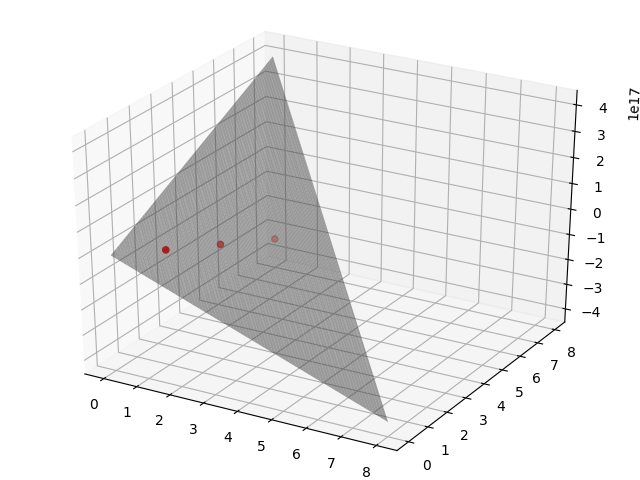

In [60]:
draw_3d(model, X, Y)

### MLP (2, 1)

In [61]:
model = rustymachine.Mlp(
    alpha=0.1,
    x_train=X,
    y_train=Y,
    npl=[1],
    type_=rustymachine.REGRESSION
)
model.fit(
    epochs=10000,
)

<IPython.core.display.Javascript object>


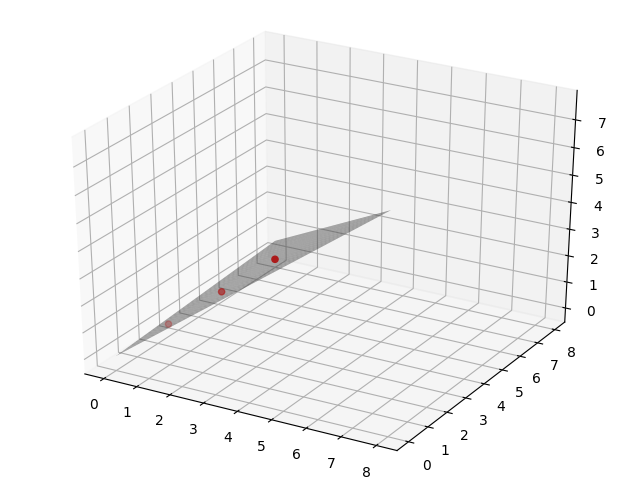

In [62]:
draw_3d(model, X, Y)

### RBF naif

<IPython.core.display.Javascript object>


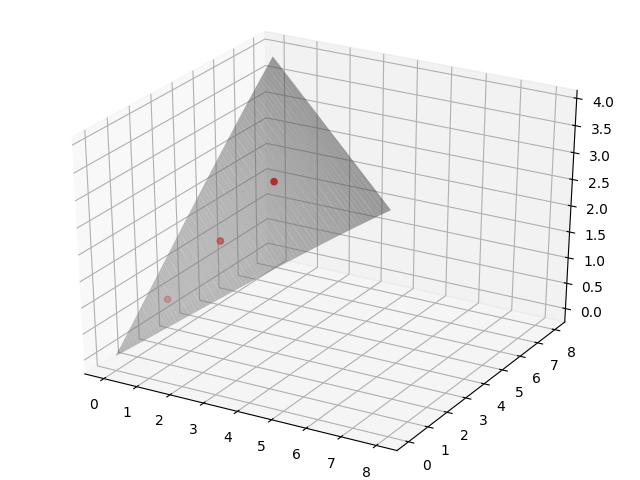

In [63]:
model = rustymachine.Rbf(
    gamma=0.001,
    x_train=X,
    y_train=Y,
    type_=rustymachine.REGRESSION
)
model.fit()
draw_3d(model, X, Y)

## Linear Tricky 3D :
   <font color='green'> - Linear Model : OK</font>
   
   <font color='green'> - MLP (2, 1)   : OK</font>
   
   <font color='green'>- RBF naif   : OK</font>

In [64]:
X = np.array([
      [1, 1],
      [2, 2],
      [3, 1]
])
Y = np.array([
      2,
      3,
      2.5
])

 ### Linear Model

In [65]:
model = rustymachine.Linear(
    x_train=X,
    y_train=Y,
    type_=rustymachine.REGRESSION,
)
model.fit()

<IPython.core.display.Javascript object>


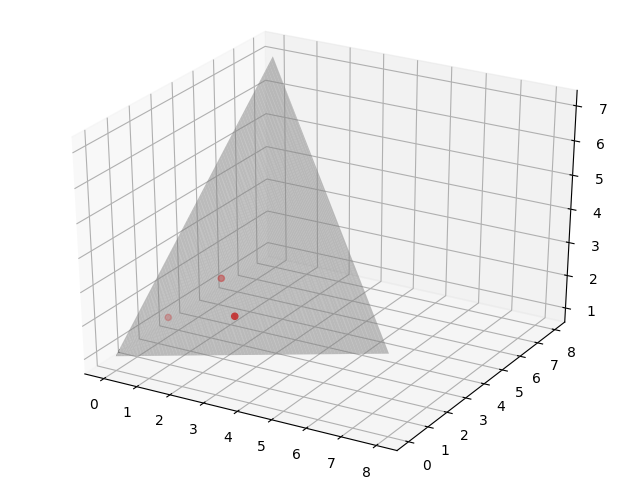

In [66]:
draw_3d(model, X, Y)

### MLP (2, 1)

In [67]:
model = rustymachine.Mlp(
    alpha=0.1,
    x_train=X,
    y_train=Y,
    npl=[1],
    type_=rustymachine.REGRESSION
)
model.fit(
    epochs=10000,
)

<IPython.core.display.Javascript object>


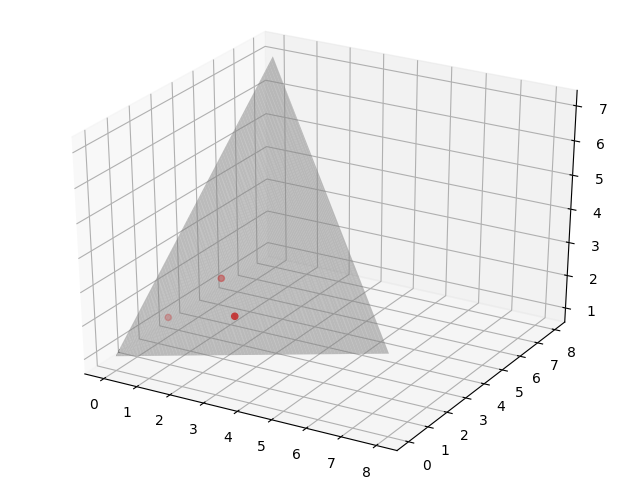

In [68]:
draw_3d(model, X, Y)

### RBF naif

<IPython.core.display.Javascript object>


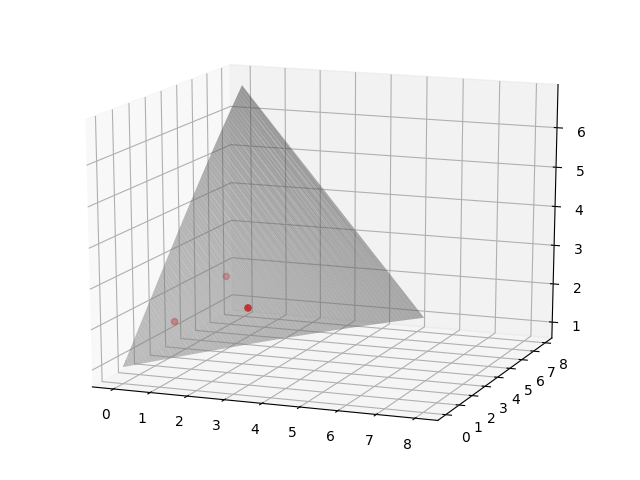

In [69]:
model = rustymachine.Rbf(
    gamma=0.001,
    x_train=X,
    y_train=Y,
    type_=rustymachine.REGRESSION
)
model.fit()
draw_3d(model, X, Y)

## Non Linear Simple 3D :
   <font color='red'> - Linear Model : KO</font>
   
   <font color='green'> - MLP (2, 2, 1) : OK</font>
   
   <font color='green'>- RBF naif   : OK</font>

In [70]:
X = np.array([
      [1, 0],
      [0, 1],
      [1, 1],
      [0, 0],
])
Y = np.array([
      2,
      1,
      -2,
      -1
])

 ### Linear Model

In [71]:
model = rustymachine.Linear(
    x_train=X,
    y_train=Y,
    type_=rustymachine.REGRESSION,
)
model.fit()

<IPython.core.display.Javascript object>


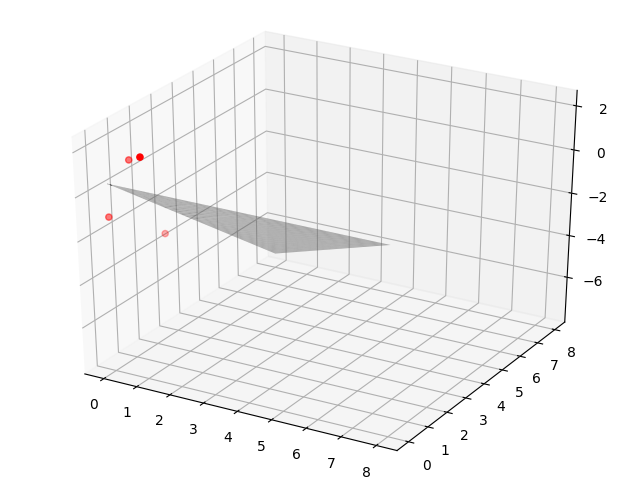

In [72]:
draw_3d(model, X, Y)

### MLP (2, 2, 1)

In [78]:
model = rustymachine.Mlp(
    alpha=0.001,
    x_train=X,
    y_train=Y,
    npl=[2, 1],
    type_=rustymachine.REGRESSION
)
model.fit(
    epochs=50000,
)

<IPython.core.display.Javascript object>


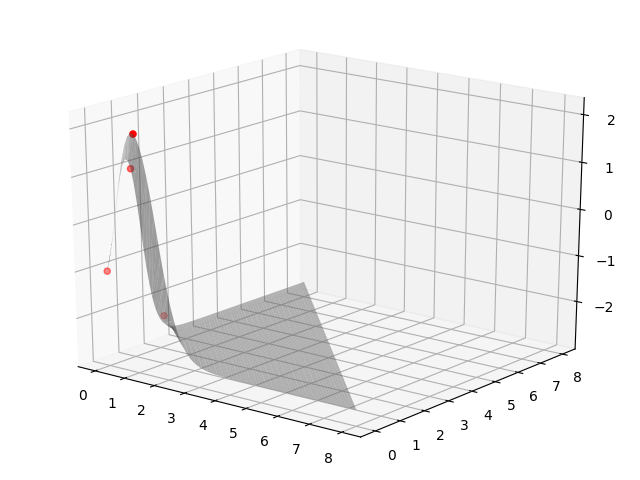

In [79]:
draw_3d(model, X, Y)

### RBF naif

In [75]:
model = rustymachine.Rbf(
    gamma=0.1,
    x_train=X,
    y_train=Y,
    type_=rustymachine.REGRESSION
)
model.fit()
draw_3d(model, X, Y)

<IPython.core.display.Javascript object>